<a href="https://colab.research.google.com/github/asra020601/Students_Survey_EDA/blob/main/wwwwwwwwwwwwwww.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset under consideration was acquired from Kaggle, a renowned platform for data science and analytics. This dataset has been specifically chosen for the purpose of conducting a detailed analysis and exploratory data analysis (EDA). By leveraging this dataset, we aim to extract meaningful information, uncover hidden patterns, and derive actionable insights that can drive informed decision-making.

In [83]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Upon examining the dataset, I have gathered some basic information to provide an overview. The dataset contains information about students and their responses to a survey.
The dataset offers a comprehensive perspective on students' academic backgrounds, extracurricular activities, technical skills, achievements, and more. It provides valuable insights into their educational journeys, interests, and involvement in various domains.
Analyzing this dataset will enable us to uncover patterns, trends, and correlations among different attributes, allowing us to gain a deeper understanding of the student population and their characteristics.

In [84]:
df = pd.read_csv('/content/Studentdata (1).csv')

In [ ]:
df.columns

Index(['ID', 'Gender', 'Year', 'Branch', '10th School Type', '10th Percentage',
       '10th_School_Location', '12th School Type', '12th_Percentage',
       '12th_School_Location', 'Drop_year', 'First_gen_graduate',
       'Volunteer_groups', 'Programming_languages', 'Invovled_in_technology',
       'Exposure_to_DSA', 'Github', 'Any_dev_community', 'Active_in_dev_com',
       'Competition', 'Software_projects', 'Hardware_projects',
       'Pitched_ideas', 'Additional_skills', 'Achievements', 'Scholarships',
       'Hackathons', 'Research Papers', 'Projects', 'None_Achievements',
       'Coding Competitions', 'Cultural Activities', 'Photography',
       'Video Editing', 'None_Additional_Skills', 'Sports', 'Development',
       'Research', 'Designing', 'Competitive Coding', 'None_technology'],
      dtype='object')

Performing an exploratory analysis, we have meticulously examined the datasets to identify unique values and scrutinize them for any potential anomalies or inconsistencies. By meticulously reviewing these distinct values, we aim to unveil any irregularities or discrepancies that may require further investigation.

In [ ]:
categorical_cols = df.select_dtypes(include="object").columns.tolist()
for col in categorical_cols:
    print(f"{col}", f"Number of unique entries: {len(df[col].unique().tolist())},")
    print(df[col].unique().tolist())

In [ ]:
df.isnull().sum() #checking for null values

Conducting a comprehensive data assessment, I have computed the percentage of null values within the datasets. This meticulous examination allows us to quantify the extent of missing data in order to gauge its potential impact on our analysis. By quantifying the percentage of null values, we gain valuable insights into the completeness and integrity of the dataset, enabling us to make informed decisions regarding data imputation or further data cleansing processes.

In [ ]:
def perc_null(x=str):
  percentage = (df[x].isnull().sum()*100)/len(df.index)
  return percentage
perc_null('6. Active in developer Communities')

15.625

In order to enhance the clarity and understandability of the dataset, I have undertaken the task of renaming the columns to more intuitive and descriptive names. By adopting more meaningful column names, we aim to facilitate easier comprehension and interpretation of the data. This process involves replacing the existing column names with more understandable labels that accurately represent the underlying variables or attributes they represent. The objective is to create a more user-friendly dataset that enables seamless analysis and promotes effective communication of insights derived from the data.

In [87]:
s =['ID','Gender','Year','Branch','10th School Type','10th Percentage','10th_School_Location','12th School Type','12th_Percentage','12th_School_Location','Drop_year','First_gen_graduate','Volunteer_groups','Programming_languages','Invovled_in_technology','Exposure_to_DSA','Github','Any_dev_community','Active_in_dev_com','Competition', 'Software_projects','Hardware_projects','Pitched_ideas', 'Additional_skills','Achievements']

In [88]:
r = df.columns
for i in range(len(s)):
   df.rename(columns = {r[i]:s[i]},inplace=True)
df

,ID,Gender,Year,Branch,10th School Type,10th Percentage,10th_School_Location,12th School Type,12th_Percentage,12th_School_Location,...,Exposure_to_DSA,Github,Any_dev_community,Active_in_dev_com,Competition,Software_projects,Hardware_projects,Pitched_ideas,Additional_skills,Achievements
0,0,Male,Third,CSE/IT,Normal Schooling,>=80% and <90%,Town,Normal Schooling,>=80% and <90%,Town,...,Hard,Medium,Yes,Active Member,Participated,Yes,No,Yes,Cultural Activities,Scholarships;Hackathons;Research Papers;Projects
1,1,Female,Second,CSIT,Schooling with Tuitions,>= 90%,City,Schooling with Tuitions,>=90%,City,...,Medium,Medium,No,Moderately active,Not yet participated,Yes,No,No,Cultural Activities,None
2,2,Male,Second,CSIT,Normal Schooling,>= 90%,City,Coaching Based Schools,>=90%,City,...,Medium,Medium,No,Inactive Member,Not yet participated,Yes,No,No,Photography;Video Editing,None
3,3,Male,Second,CSIT,Normal Schooling,>=70% and <80%,City,Normal Schooling,>=80% and <90%,City,...,Medium,Easy,Yes,Moderately active,Not yet participated,Yes,Yes,No,None,None
4,4,Male,Second,CSIT,Normal Schooling,>=70% and <80%,City,Normal Schooling,>=80% and <90%,City,...,Medium,Hard,Yes,Active Member,Participated,Yes,No,Yes,None,Hackathons;Coding Competitions;Projects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,251,Female,Third,CSE,Schooling with Tuitions,>= 90%,Town,Schooling with Tuitions,>=90%,Town,...,Easy,Easy,No,NaN,Participated,Yes,No,No,Sports,Projects
252,252,Male,Second,ECE,Normal Schooling,>=80% and <90%,City,Normal Schooling,>=70% and <80%,City,...,Medium,Medium,No,Inactive Member,Participated,No,Yes,Yes,Sports,Projects
253,253,Male,Second,CSIT,Normal Schooling,>= 90%,City,Normal Schooling,>=90%,City,...,Medium,Medium,No,Inactive Member,Participated,Yes,No,Yes,None,Projects
254,254,Male,Second,ECE,Normal Schooling,>=80% and <90%,City,Normal Schooling,>=80% and <90%,City,...,Easy,Easy,Yes,Active Member,Not yet participated,No,Yes,Yes,Photography;Video Editing;Sports,Projects


To enhance the comprehensibility of the dataset, we have divided the 'achievements' and 'additional skills' columns into separate sub-columns. This division allows for a more detailed understanding of the various achievements and additional skills possessed by the students. By organizing the data in this manner, it becomes easier to analyze and interpret the specific accomplishments and skills demonstrated by each student. This level of granularity provides a comprehensive view of the students' achievements and additional skills, facilitating a more comprehensive analysis of their capabilities and qualifications.

In [89]:
for i in range(len(df['Achievements'])):
  df['Achievements'][i]=df['Achievements'][i].split(';')
df[['Scholarships','Hackathons','Research Papers','Projects','None_Achievements','Coding Competitions']]= np.nan
for i in range(len(df['Achievements'])):
  for j in range(len(df['Achievements'][i])):
   if df["Achievements"][i][j]=='Scholarships':
      df['Scholarships'][i]='Scholarship'
   elif df["Achievements"][i][j]=='Hackathons':
      df['Hackathons'][i]='Hackathons'
   elif df["Achievements"][i][j]=='Research Papers':
      df['Research Papers'][i]='Research Papers'
   elif df["Achievements"][i][j]=='Projects':
      df['Projects'][i]='Projects'
   elif df["Achievements"][i][j]=='None':
      df['None_Achievements'][i]='None'
   elif df["Achievements"][i][j]=='Coding Competitions':
      df['Coding Competitions'][i]='Coding Competitions'


In [ ]:
df.drop('Achievements',axis = 1,inplace = True)

In [90]:
for i in range(len(df['Additional_skills'])):
  df['Additional_skills'][i]=df['Additional_skills'][i].split(';')
df[['Cultural Activities','Photography','Video Editing','None_Additional_Skills','Sports']] =np.nan
for i in range(len(df['Additional_skills'])):
  for j in range(len(df['Additional_skills'][i])):
   if df["Additional_skills"][i][j]=='Cultural Activities':
      df['Cultural Activities'][i]='Cultural Activities'
   elif df["Additional_skills"][i][j]=='Photography':
      df['Photography'][i]='Photography'
   elif df["Additional_skills"][i][j]=='Video Editing':
      df['Video Editing'][i]='Video Editing'
   elif df["Additional_skills"][i][j]=='None':
      df['None_Additional_Skills'][i]='None'
   elif df["Additional_skills"][i][j]=='Sports':
      df['Sports'][i]='Sports'

In [ ]:
df.drop('Additional_skills',axis = 1,inplace = True)

In [91]:
for i in range(len(df['Invovled_in_technology'])):
  df['Invovled_in_technology'][i]=df['Invovled_in_technology'][i].split(';')
df[['Development','Research','Designing','Competitive Coding','None_technology']] =np.nan
for i in range(len(df['Invovled_in_technology'])):
  for j in range(len(df['Invovled_in_technology'][i])):
   if df["Invovled_in_technology"][i][j]=='Development':
      df['Development'][i]='Development'
   elif df["Invovled_in_technology"][i][j]=='Research':
      df['Research'][i]='Research'
   elif df["Invovled_in_technology"][i][j]=='Video Editing':
      df['Video Editing'][i]='Video Editing'
   elif df["Invovled_in_technology"][i][j]=='Designing':
      df['Designing'][i]='Designing'
   elif df["Invovled_in_technology"][i][j]=='None_technology':
      df['None_technology'][i]='None'
   elif df["Invovled_in_technology"][i][j]=='Competitive Coding':
      df['Competitive Coding'][i]='Competitive Coding'

In [ ]:
df.drop('Invovled_in_technology',axis = 1,inplace = True)

In [92]:
df['Scholarships'].replace(np.nan,'Not Scholarship',inplace = True)
df['Projects'].replace(np.nan,'No Projects',inplace = True)
df['Coding Competitions'].replace(np.nan,'No Competitions',inplace = True)
df['Competitive Coding'].replace(np.nan,'No Competitive Coding',inplace = True)
df['Sports'].replace(np.nan,'No Sports',inplace = True)

In [ ]:
df['Programming_languages']

0      More than 5
1              2-3
2              2-3
3              2-3
4      More than 5
          ...     
251            4-5
252              1
253            2-3
254              1
255            2-3
Name: Programming_languages, Length: 256, dtype: object

# **EDA**

Upon analysis, it becomes evident that the frequency of first-generation graduates is notably lower in comparison to individuals from subsequent generations, namely second or even third-generation graduates.

In [ ]:
ff = df['First_gen_graduate'].value_counts().plot(kind='bar')
ff.set_xticklabels(ff.get_xticklabels(), rotation=360,horizontalalignment='right')
plt.show()

A comprehensive examination of the data reveals that the majority of students possess knowledge of approximately 2-3 languages, while a significantly smaller proportion, less than 3%, demonstrate proficiency in 5 or more languages. Moreover, a noteworthy 30% of students exhibit competency in at least one language.

In [ ]:
colors = ['#FF0000', '#0000FF', '#FFFF00',
          '#ADFF2F', '#FFA500']
labels = ['2-3', '1', '4-5','More than 5']
plt.pie(df['Programming_languages'].value_counts(), colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Number of Programming Languages')
plt.show()

A thorough analysis of the data regarding students' branch distribution illustrates that a substantial majority of students are enrolled in branches such as Computer Science/Information Technology (CS/IT) and Computer Science (CS), indicating a significant concentration in these fields. Conversely, the smallest proportion of students is found in the Civil Engineering (CE) branch, suggesting a relatively lower representation in this particular field of study.

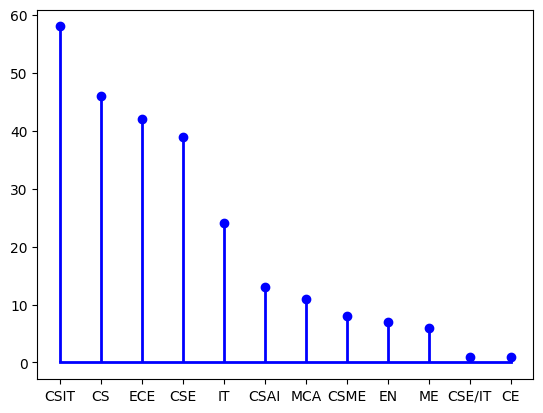

<Figure size 2000x300 with 0 Axes>

In [ ]:
ordered_df = df['Branch'].value_counts()
my_range=range(0,len(df['Branch'].value_counts().index))
bb = plt.stem(ordered_df)
plt.xticks( my_range, labels = df['Branch'].value_counts().index)
plt.setp(bb, color='b', linewidth=2)
plt.figure(figsize=(20, 3))
plt.show()

The pie chart depicts the distribution of students' comfort levels when it comes to tackling data structure and algorithm (DSA) questions. Notably, the majority of students, representing a significant portion, express their comfort with medium and easy DSA questions, displaying a nearly equal split between the two categories. In contrast, a mere fraction, less than 5% of students, feel confident in their ability to solve DSA questions, indicating a relatively lower proficiency in this area.

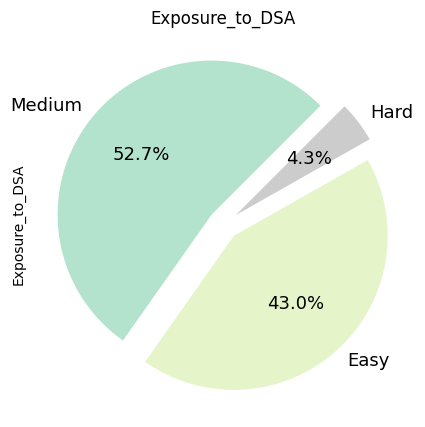

In [ ]:
kwargs = dict(
    startangle = 45,
    colormap   = 'Pastel2',
    fontsize   = 13,
    explode    = (0.1,0.1,0.1),
    figsize    = (60,5),
    autopct    = '%1.1f%%',
    title      = 'Exposure_to_DSA'
)

df['Exposure_to_DSA'].value_counts().plot.pie(**kwargs)
plt.show()

The two bar charts, which compare the percentages of students in their 12th and 10th grades, exhibit striking similarities. Both charts display a left-skewed distribution, indicating that a significant number of students have achieved high percentages in both academic periods. The majority of students fall into the above 90% and 80-90% ranges in both cases, suggesting a consistently high level of academic performance. However, it is noteworthy that there are few instances where students have obtained percentages below 60%, signifying a relatively small proportion of students who have achieved lower scores in their academic assessments.

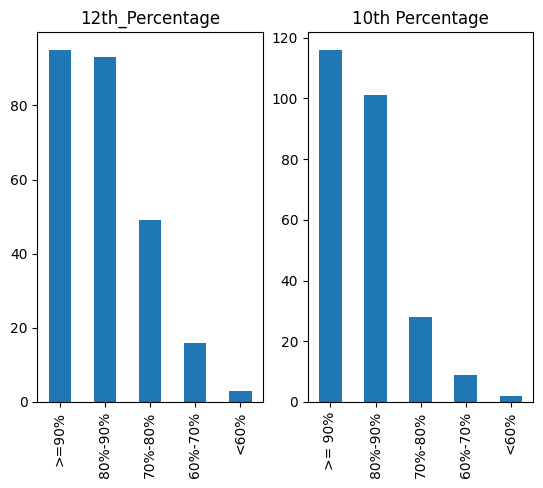

In [ ]:
df = df.replace({'12th_Percentage':{'>=80% and <90%':'80%-90%', '>=60% and <70%':'60%-70%','>=70% and <80%':'70%-80%'}})
df = df.replace({'10th Percentage':{'>=80% and <90%':'80%-90%', '>=60% and <70%':'60%-70%','>=70% and <80%':'70%-80%'}})
categorical_features = ["12th_Percentage", "10th Percentage"]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df[categorical_features]):
    cc = df[categorical_feature].value_counts().plot(kind = "bar", ax=ax[i]).set_title(categorical_feature,rotation=360)
fig.show()

The chart presented below depicts the exposure to Data Structure and Algorithms (DSA) among different branches of students. Notably, the category of 'Hard' DSA questions appears to be relatively uncommon across all branches. Instead, the majority of students, regardless of their branch, exhibit a higher level of comfort with 'Medium' level DSA questions. Surprisingly, rather than finding 'Easy' level questions as the most prevalent, the chart reveals that most students have developed proficiency in tackling 'Medium' difficulty DSA questions. This indicates that students have attained a certain level of competence in DSA concepts, allowing them to handle moderately challenging problems with relative ease.

<Figure size 1000x600 with 0 Axes>

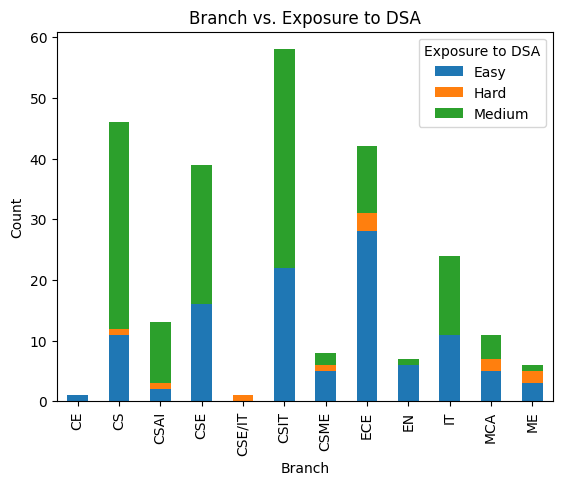

In [93]:
contingency_table = pd.crosstab(df['Branch'], df['Exposure_to_DSA'])
plt.figure(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=True)
plt.title('Branch vs. Exposure to DSA')
plt.xlabel('Branch')
plt.ylabel('Count')
plt.legend(title='Exposure to DSA')
plt.show()

In order to understand the relationship between volunteer participation and scholarships, a comparison was conducted. The results reveal that a significant proportion of students have been involved in volunteer activities, indicating their active engagement in social and community initiatives. Conversely, the frequency of students receiving scholarships appears to be relatively lower. This suggests that while many students actively contribute their time and efforts towards volunteering, the number of students who have received scholarships as a recognition of their academic achievements or other exceptional accomplishments is comparatively limited. The data highlights the significance of volunteer work among students and the potential opportunities for further recognition and support in the form of scholarships.

<Figure size 1000x600 with 0 Axes>

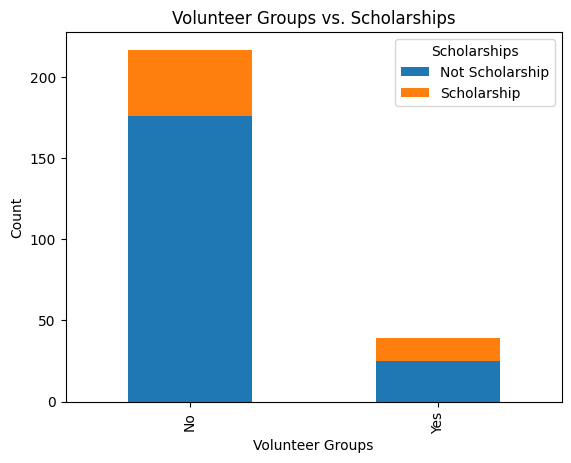

In [94]:
contingency_table = pd.crosstab(df['Volunteer_groups'], df['Scholarships'])
plt.figure(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=True)
plt.title('Volunteer Groups vs. Scholarships')
plt.xlabel('Volunteer Groups')
plt.ylabel('Count')
plt.legend(title='Scholarships')
plt.show()

The barchart depicting the relationship between coding competitions and programming languages reveals interesting insights. Among the students who actively participate in coding competitions, a majority of them possess knowledge of at least 2-3 programming languages. This suggests that their involvement in coding competitions motivates them to acquire proficiency in multiple programming languages to enhance their competitiveness and problem-solving abilities.

On the other hand, approximately 40% of students who do not participate in coding competitions exhibit proficiency in only one programming language. This indicates that their focus and exposure to programming languages may be limited compared to their counterparts involved in coding competitions.

Furthermore, it is worth noting that the participation rate in coding competitions is relatively low among the student population. This implies that only a fraction of students actively engage in these competitive coding events, potentially due to various factors such as personal preferences, time constraints, or differing career aspirations.

Overall, the data highlights the correlation between coding competitions and programming language proficiency, emphasizing the significance of these competitions in fostering multi-language skills among participants.

<Figure size 1000x600 with 0 Axes>

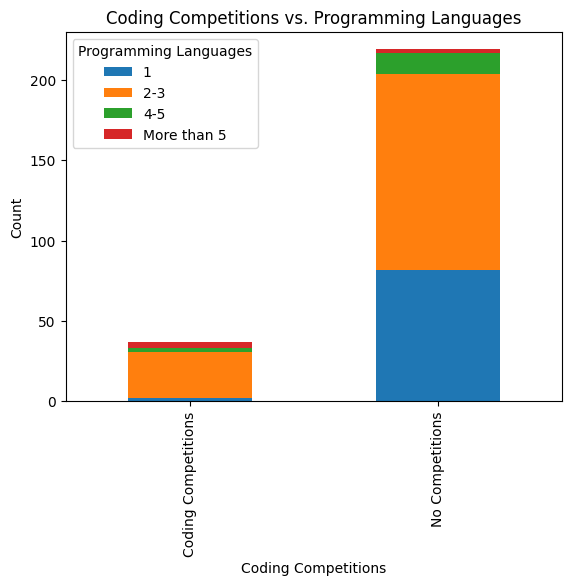

In [95]:
contingency_table = pd.crosstab(df['Coding Competitions'], df['Programming_languages'])
plt.figure(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=True)
plt.title('Coding Competitions vs. Programming Languages')
plt.xlabel('Coding Competitions')
plt.ylabel('Count')
plt.legend(title='Programming Languages')
plt.show()

The comparison between programming languages and academic years reveals interesting patterns. In the third year, it can be observed that every student knows at least one programming language. This suggests that by the third year, students have gained a foundational understanding of programming languages and have likely been exposed to programming courses as part of their curriculum.

On the other hand, in the first year, a majority of students are proficient in only one programming language. This indicates that students are initially introduced to programming concepts and languages during their first year of study, focusing on building a strong foundation in a single language.

However, an intriguing trend emerges in the second year, where the number of students who know 2-3 programming languages increases dramatically. This suggests that as students progress through their academic journey and gain more exposure to various programming languages, their proficiency and knowledge expand, enabling them to work with multiple languages simultaneously.

This progression in programming language proficiency aligns with the natural learning curve and curriculum structure, where students are gradually exposed to more advanced programming concepts and languages as they advance through their academic years.

Overall, the data showcases the development of programming language skills over the years, with students transitioning from knowing only one language in the first year to expanding their knowledge and proficiency in multiple languages by the second year and beyond.

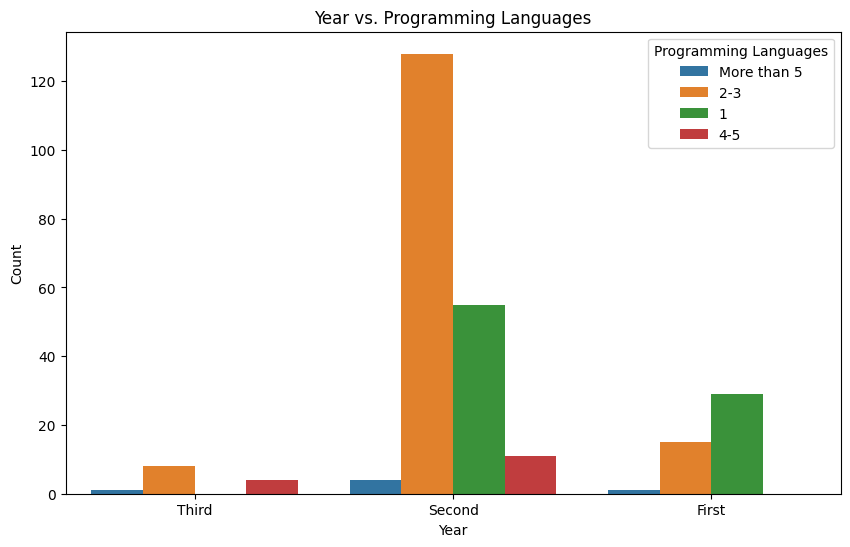

In [96]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Year', hue='Programming_languages')
plt.title('Year vs. Programming Languages')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Programming Languages')
plt.show()

The heatmap depicting the relationship between projects and coding competitions reveals interesting insights. The majority of students fall into the category of not participating in coding competitions and having no projects. This indicates that a significant portion of the student population is not actively engaged in either coding competitions or independent project work.

However, there is a considerable proportion of students who do not participate in coding competitions but have projects. This suggests that these students are more focused on individual project work or collaborative projects outside the scope of coding competitions. They may be involved in personal or academic projects that allow them to apply their coding skills in practical settings.

On the other hand, the number of students who both participate in coding competitions and have projects is relatively small. These students strike a balance between competitive coding and undertaking independent or collaborative project work. They may find value in both arenas, leveraging coding competitions to challenge themselves and projects to explore real-world applications of their coding skills.

It is worth noting that there is also a smaller group of students who participate in coding competitions without having any projects students who both participate in coding competitions and have projects.This indicates that there is a subset of students who actively engage in coding competitions but do not pursue separate project endeavors. These individuals may prefer the competitive nature of coding competitions and find satisfaction in honing their coding skills through such events.

In summary, the heatmap reveals the distribution of students based on their involvement in coding competitions and project work. It highlights the prevalence of students who do not participate in competitions and lack projects, as well as the varying proportions of students who are involved in either coding competitions or project work, or both.

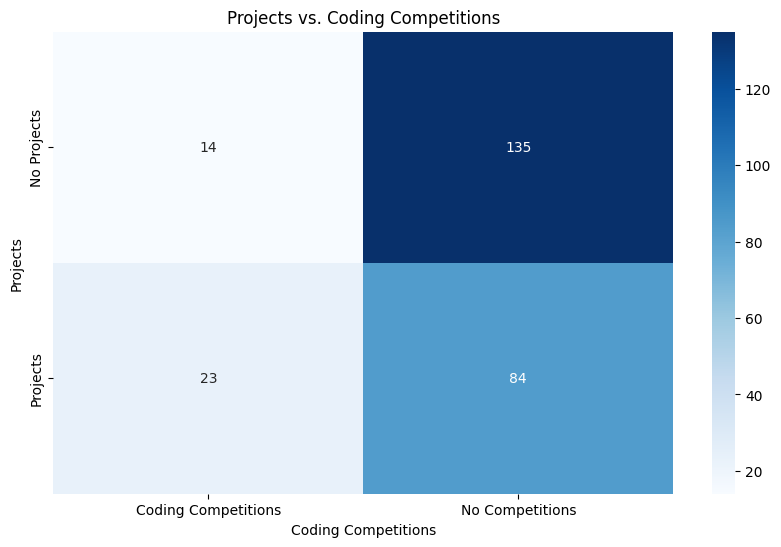

In [97]:
contingency_table = pd.crosstab(df['Projects'], df['Coding Competitions'])
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Projects vs. Coding Competitions')
plt.xlabel('Coding Competitions')
plt.ylabel('Projects')
plt.show()

The presented heatmap illustrates the correlation between the frequency of students based on their proficiency in programming languages and their involvement in sports activities. It provides insights into the relationship between the number of programming languages known by students and their participation in sports.

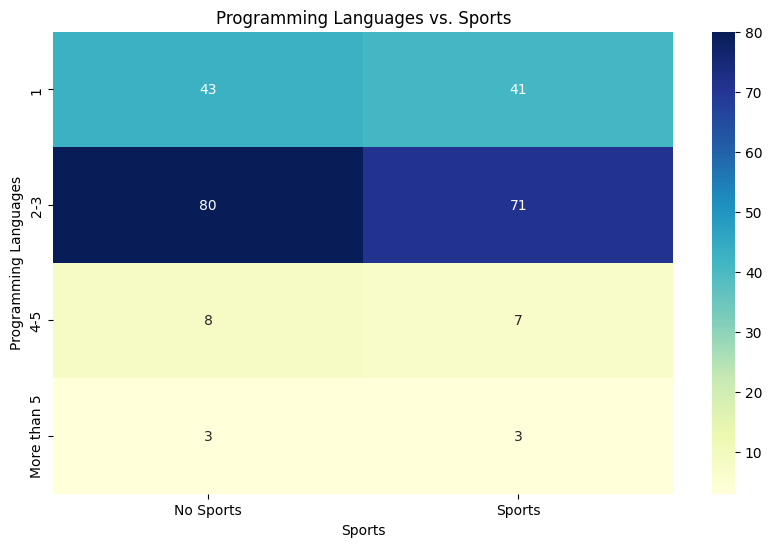

In [99]:
contingency_table = pd.crosstab(df['Programming_languages'], df['Sports'])
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Programming Languages vs. Sports')
plt.xlabel('Sports')
plt.ylabel('Programming Languages')
plt.show()